📉 RMSE: 128719.73
📈 R² Score: 0.873


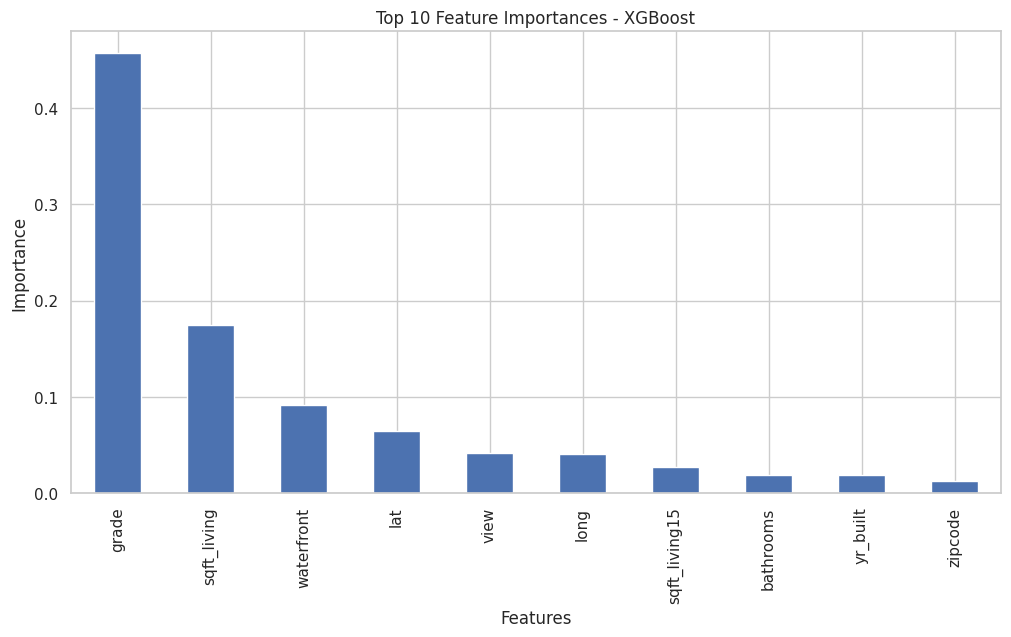

In [7]:
!pip install xgboost --quiet

# 📦 Code complet avec XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Setup
sns.set(style="whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load & clean dataset
df = pd.read_csv("/content/kc_house_data.csv")  # change path if needed
df = df.drop_duplicates()
df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)]
df = df.drop(columns=['id', 'date'])

# Features & target
X = df.drop(columns='price')
y = df['price']
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.3f}")

# Feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances - XGBoost")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
